# Estadística sobre las Trayectorias.
Varias medidas en busca de significado estadístico de los cálculos de las trayectorias de los Centros de Masa, definidos en el Notebook TrackingtheTracks.

In [1]:
using JLD
using PyPlot
using StatsBase, Statistics
push!(LOAD_PATH,"./")

4-element Array{String,1}:
 "@"
 "@v#.#"
 "@stdlib"
 "./"

In [6]:
cm2p=1/2.54;

In [3]:
using TrayectoriasAux

┌ Info: Precompiling TrayectoriasAux [top-level]
└ @ Base loading.jl:1260


In [7]:
Datos=load("../JLDFiles/TrabajandoCentrosdeMasa/LFP_Promedio_est_bic5-CM-Tray.jld")

Dict{String,Any} with 2 entries:
  "CatenarioPositivo" => Set(Array{Any,N} where N[[31.2014 11.2472 38.8053 167.…
  "CatenarioNegativo" => Set(Array{Any,N} where N[[46.1679 10.0396 -57.3452 96.…

In [8]:
CatenarioPozos=set2dict(Datos["CatenarioNegativo"])
CatenarioFuentes=set2dict(Datos["CatenarioPositivo"]);

In [9]:
umpalumpa=load("../JLDFiles/TrabajandoCentrosdeMasa/LFP_Promedio_est_bic5.jld")
nmax=size(umpalumpa["LFPSaturados"],  3)
freq=umpalumpa["freq"]
tmax=nmax/freq

65.13398484123232

In [10]:
dispozos=TrayectoriasAux.distprom(CatenarioPozos);
disfuentes=TrayectoriasAux.distprom(CatenarioFuentes)
length(disfuentes)

105

In [11]:
distie=42 #distancia inter electrodo
cajas=0:25:800

tantos=length(dispozos)
vspozos=zeros(tantos)


for j in 1:tantos
    vspozos[j]=dispozos[j]
end
# la vs esta en unidades "de la MEA", asi que... escalas
vspozos=vspozos*distie*freq;
histvpozos=fit(Histogram, vspozos, cajas,closed=:right)

tantos=length(disfuentes)
vsfuentes=zeros(tantos)
for j in 1:tantos
    vsfuentes[j]=disfuentes[j]
end
# la vs esta en unidades "de la MEA", asi que... escalas

vsfuentes=vsfuentes*distie*freq;
histvfuentes=fit(Histogram, vsfuentes, cajas,closed=:right)


Histogram{Int64,1,Tuple{StepRange{Int64,Int64}}}
edges:
  0:25:800
weights: [0, 1, 1, 2, 3, 3, 1, 2, 3, 3  …  1, 4, 1, 2, 1, 2, 4, 1, 1, 2]
closed: right
isdensity: false

In [12]:
centroshistopozos=(histvpozos.edges[1][2:end]+histvpozos.edges[1][1:end-1])/2
centroshistofuentes=(histvfuentes.edges[1][2:end]+histvfuentes.edges[1][1:end-1])/2

ancho=15


15

In [13]:
mvp, mvf = (round(Int, mean(vspozos)), round(Int, mean(vsfuentes)) )

(216, 514)

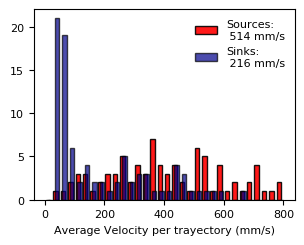

In [15]:

fu=figure(figsize=(8*cm2p,6.5*cm2p))
fs=8

xlabel("Average Velocity per trayectory (mm/s)", fontsize=fs)

#ylabel("Total Count", fontsize=fs)
xticks(fontsize=fs)
yticks(fontsize=fs)

bar(centroshistofuentes.-2, histvfuentes.weights, ancho, color="red", 
    alpha=0.9, edgecolor="black", lw=1, label="Sources:\n $mvf mm/s")
bar(centroshistopozos.+4, histvpozos.weights, ancho, 
    color="darkblue", alpha=0.7, edgecolor="black", lw=1, label="Sinks:\n $mvp mm/s")
#annotate()
legend(loc=1, fontsize=fs, frameon=false)

tight_layout()
savefig("HistogramVelocities_est_bic5.svg",dpi=90)
savefig("HistogramVelocities_est_bic5.png",dpi=90)

In [16]:
std(vspozos), std(vsfuentes)

(223.37734291282152, 285.24937473398523)

In [17]:
dist2D(xx::Array, yy::Array)=dist(xx[1], yy[1], xx[2], yy[2])

function distanciasAcumuladas(cadena::Array)
    jmax,bla=size(cadena)
    result=zeros(jmax)
    acu=0
    for j=1:jmax-1
        acu+=dist2D(cadena[j,:],cadena[j+1,:])
        result[j+1]=acu
    end
    return result
end

distanciasAcumuladas (generic function with 1 method)

In [18]:
PyPlot.ion()
figure(figsize=(17.5*cm2p,6.5*cm2p))
#axis("equal")
#xlim(0.0,25.0)
xmaa=2000
xlim(0,xmaa)
ylim(90,2500.0)

for p in values(CatenarioPozos)
    #println(p)
    #offset=p[1,4]./100
    xxpos=distanciasAcumuladas(p)#.+offset
    xme=mean(xxpos)
    yypos=map(x->abs(x), p[:,3])
    parcor=1.5*xme/xmaa
    cores=(0, 0.7*parcor, 1-parcor*parcor)
    plot(xxpos,yypos, lw=0.5, color=cores)
end


Figure(PyObject <Figure size 688.976x255.906 with 1 Axes>)

In [19]:
tmax

65.13398484123232

In [20]:
freq

17.85550205219098

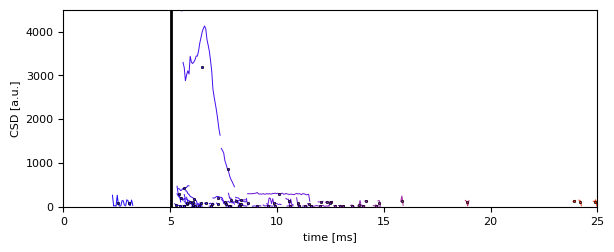

In [24]:
figure(figsize=(17.5*cm2p,6.5*cm2p))

#axis("equal")

xlim(0,tmax)
ylim(-0.0,4500.0)
fs=8
xlabel("time [ms]",fontsize=fs)
ylabel("CSD [a.u.]", fontsize=fs)
xticks(fontsize=fs)
yticks(fontsize=fs)
xmaa=25
xlim(0,xmaa)

for p in values(CatenarioFuentes)
    xxpos=p[:,4]./freq
    timecentro=mean(xxpos)
    yypos=map(x->abs(x), p[:,3])
    gordocentro=mean(yypos)
    parcor=timecentro/xmaa
    if parcor <=1
        cores=(parcor, 0.2*parcor, 1-parcor*parcor)
    #println(timecentro)
        plot(xxpos,yypos, c=cores, lw=0.7, zorder=1)
    #print(timecentro)
        scatter(timecentro,gordocentro, color=cores, s=3 ,
            lw=0.5, edgecolor="black", zorder=10)

    end
end
    
vlines([umpalumpa["retrazo"]/freq], 0, 5000, lw=2)

savefig("Fuentes_est_bic5-tiempovsintensidad.svg", dpi=90)
savefig("Fuentes_est_bic5-tiempovsintensidad.png", dpi=90)

In [73]:
?vlines

search: vlines axvline



Plot vertical lines.

Plot vertical lines at each *x* from *ymin* to *ymax*.

Parameters
----------
x : scalar or 1D array_like
    x-indexes where to plot the lines.

ymin, ymax : scalar or 1D array_like
    Respective beginning and end of each line. If scalars are
    provided, all lines will have same length.

colors : array_like of colors, optional, default: 'k'

linestyles : {'solid', 'dashed', 'dashdot', 'dotted'}, optional

label : string, optional, default: ''

Returns
-------
lines : `~matplotlib.collections.LineCollection`

Other Parameters
----------------
**kwargs : `~matplotlib.collections.LineCollection` properties.

See also
--------
hlines : horizontal lines
axvline: vertical line across the axes

Notes
-----


.. note::
    In addition to the above described arguments, this function can take a
    **data** keyword argument. If such a **data** argument is given, the
    following arguments are replaced by **data[<arg>]**:

    * All arguments with the following names: '

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = show(::IOContext{Base.GenericIOBuffer{Array{UInt8,1}}}, ::MIME{Symbol("text/plain")}, ::PyPlot.LazyHelp) at PyPlot.jl:27
└ @ PyPlot /home/karel/.julia/packages/PyPlot/XHEG0/src/PyPlot.jl:27


In [15]:
CatenarioPozos[20]

5×4 Array{Any,2}:
 21.7649  59.8442  -321.962  145.0
 21.5407  59.8809  -293.063  146.0
 21.556   59.4634  -148.093  147.0
 21.803   60.7994  -195.478  148.0
 21.4534  61.5755  -134.934  149.0